In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
import pathlib
directory_train = pathlib.Path('../data/train')
directory_test = pathlib.Path('../data/test')

In [4]:
batch_size = 32
dimension = 180

In [5]:
dataset_train = tf.keras.utils.image_dataset_from_directory(
    directory_train,
    seed=372,
    image_size=(dimension, dimension),
    batch_size=batch_size,
    color_mode='grayscale'
)

Found 28709 files belonging to 7 classes.


2021-10-03 18:37:26.747379: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
dataset_test = tf.keras.utils.image_dataset_from_directory(
    directory_test,
    seed=372,
    image_size=(dimension, dimension),
    batch_size=batch_size,
    color_mode='grayscale'
)

Found 7178 files belonging to 7 classes.


In [7]:
autotune = tf.data.AUTOTUNE
dataset_train = dataset_train.cache().shuffle(1000).prefetch(buffer_size=autotune)
dataset_test = dataset_test.cache().prefetch(buffer_size=autotune)

In [8]:
normalization = layers.Rescaling(1./255)

In [38]:
num_classes = 7

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [40]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [41]:
epochs=10
history = model.fit(
  dataset_train,
  validation_data=dataset_test,
  epochs=epochs
)


Epoch 1/10


2021-10-03 17:19:49.592482: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


898/898 [==============================] - 256s 278ms/step - loss: 2.5929 - accuracy: 0.3098 - val_loss: 1.6120 - val_accuracy: 0.3695
Epoch 2/10
898/898 [==============================] - 253s 282ms/step - loss: 1.5151 - accuracy: 0.4090 - val_loss: 1.5038 - val_accuracy: 0.4140
Epoch 3/10
898/898 [==============================] - 259s 288ms/step - loss: 1.2945 - accuracy: 0.5095 - val_loss: 1.4497 - val_accuracy: 0.4457
Epoch 4/10
898/898 [==============================] - 255s 284ms/step - loss: 1.0458 - accuracy: 0.6106 - val_loss: 1.5562 - val_accuracy: 0.4525
Epoch 5/10
898/898 [==============================] - 243s 270ms/step - loss: 0.7697 - accuracy: 0.7197 - val_loss: 1.7997 - val_accuracy: 0.4490
Epoch 6/10
898/898 [==============================] - 242s 270ms/step - loss: 0.5366 - accuracy: 0.8098 - val_loss: 2.3737 - val_accuracy: 0.4490
Epoch 7/10
898/898 [==============================] - 243s 270ms/step - loss: 0.3532 - accuracy: 0.8782 - val_loss: 2.9024 - val_accura

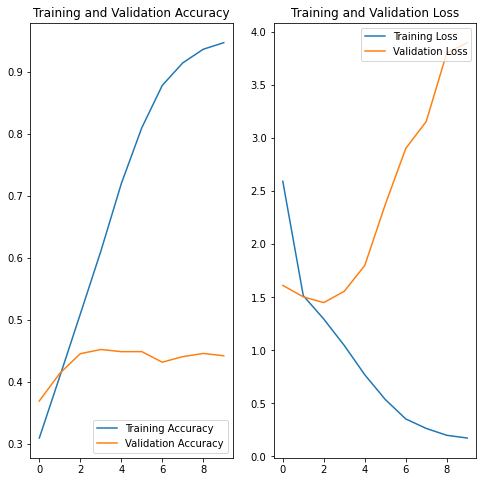

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [9]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(dimension,
                                  dimension,
                                  1)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


2021-10-03 18:37:49.992683: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


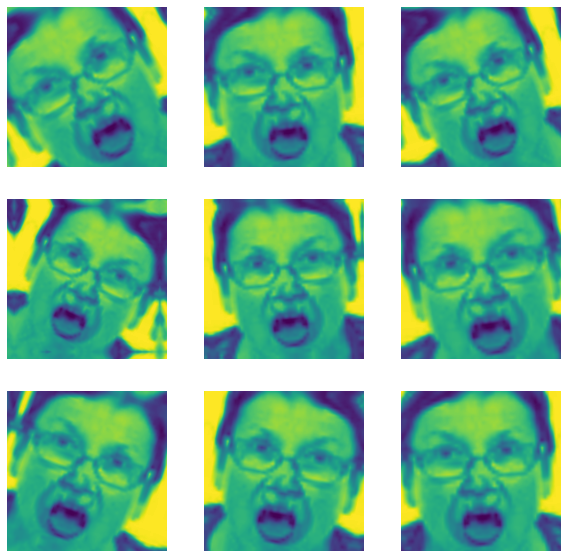

In [10]:
plt.figure(figsize=(10, 10))
for images, _ in dataset_train.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [12]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(7)
])


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 1)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [15]:
epochs = 15
history = model.fit(
  dataset_train,
  validation_data=dataset_test,
  epochs=epochs
)

Epoch 1/15
898/898 [==============================] - 269s 298ms/step - loss: 1.7630 - accuracy: 0.2750 - val_loss: 1.6750 - val_accuracy: 0.3355
Epoch 2/15
898/898 [==============================] - 261s 291ms/step - loss: 1.6491 - accuracy: 0.3465 - val_loss: 1.5570 - val_accuracy: 0.3940
Epoch 3/15
898/898 [==============================] - 260s 289ms/step - loss: 1.5571 - accuracy: 0.3961 - val_loss: 1.4774 - val_accuracy: 0.4299
Epoch 4/15
898/898 [==============================] - 257s 286ms/step - loss: 1.5026 - accuracy: 0.4181 - val_loss: 1.4270 - val_accuracy: 0.4510
Epoch 5/15
898/898 [==============================] - 258s 287ms/step - loss: 1.4559 - accuracy: 0.4389 - val_loss: 1.4036 - val_accuracy: 0.4561
Epoch 6/15
898/898 [==============================] - 256s 285ms/step - loss: 1.4262 - accuracy: 0.4495 - val_loss: 1.3724 - val_accuracy: 0.4673
Epoch 7/15
898/898 [==============================] - 254s 283ms/step - loss: 1.3979 - accuracy: 0.4620 - val_loss: 1.3530 -

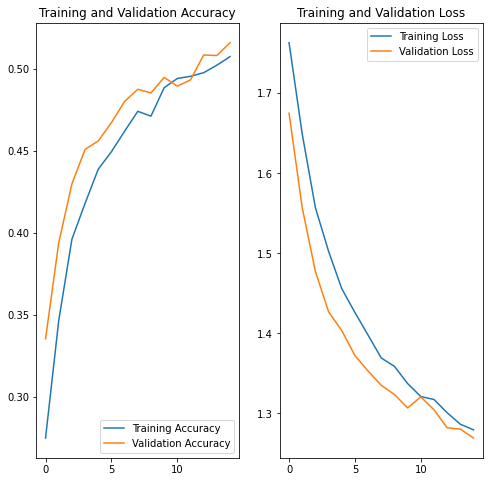

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
